### Practice Exercises (Polynomial Regression Model)

In [17]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent
sys.path.insert(0, str(project_root))

from pathlib import Path
import sys

current_dir = Path.cwd()

project_root = current_dir.parent.absolute()

sys.path.insert(0,str(project_root))

from config import DATASETS_DIR, TEMP_POWER_USAGE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# loading the dataset
df = pd.read_csv(TEMP_POWER_USAGE)

df.shape

(10, 2)

In [24]:
#feature and target variable
X = df[['Temperature']].values
y = df[['PowerUsage']].values

R2 score at degree 1 is 0.31748929740619514
R2 score at degree 2 is 0.981482938806346
R2 score at degree 3 is 0.9976435729552073
R2 score at degree 4 is 0.9979105324500062


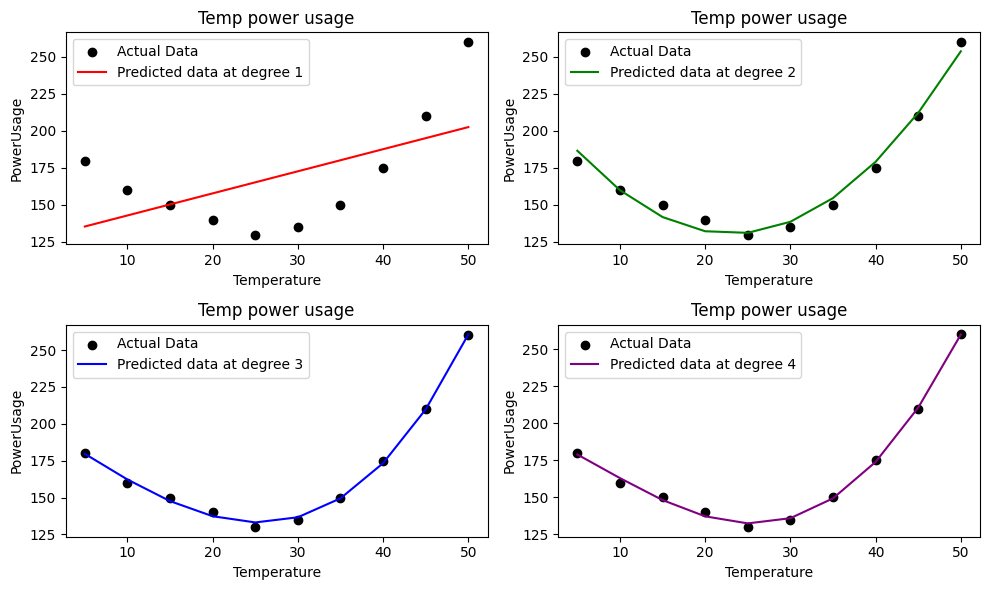

In [29]:
#visualization at different degree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

degrees = [1,2,3,4]
color= ['red','green','blue','purple']
plt.figure(figsize=(10,6))

for i, degree in enumerate(degrees):
    plt.subplot(2,2, i+1)

    #model
    poly = PolynomialFeatures(degree=degree)
    poly_X = poly.fit_transform(X)

    ln_poly = LinearRegression()
    ln_poly.fit(poly_X,y)


    plt.scatter(X,y,color='black',label='Actual Data')
    plt.plot(X,ln_poly.predict(poly_X),color=color[i],label=f'Predicted data at degree {degree}')
    plt.title("Temp power usage")
    plt.ylabel("PowerUsage")
    plt.xlabel("Temperature")
    plt.legend()

    R2 = r2_score(y,ln_poly.predict(poly_X))
    print(f'R2 score at degree {degree} is {R2}')
plt.tight_layout()
plt.show()

here in the evalution, it is clearly visible tht linear regression is not fit for this dataset as it R2 score is 0.314.
so we have to use polynomial regression